# RANDOM FOREST CLASSIFIER ALGORITHEM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('CTG.csv')
del df['FileName']
del df['Date']
del df['SegFile']
del df['b']
del df['e']
df.head()

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,132.0,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [3]:
df.columns

Index(['LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL',
       'DS', 'DP', 'DR', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros', 'Mode',
       'Mean', 'Median', 'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD',
       'DE', 'LD', 'FS', 'SUSP', 'CLASS', 'NSP'],
      dtype='object')

In [4]:
df=df.dropna()

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['CLASS','NSP']
  
for i in var:
    df[i] = le.fit_transform(df[i]).astype(int)

In [6]:
df.tail()

,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
2121,140.0,140.0,0.0,0.0,6.0,79.0,0.2,25.0,7.2,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,1
2122,140.0,140.0,1.0,0.0,9.0,78.0,0.4,22.0,7.1,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,1
2123,140.0,140.0,1.0,0.0,7.0,79.0,0.4,20.0,6.1,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,1
2124,140.0,140.0,1.0,0.0,9.0,78.0,0.4,27.0,7.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4,1
2125,142.0,142.0,1.0,1.0,5.0,74.0,0.4,36.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [7]:
x1 = df.drop(labels='NSP', axis=1)
y1 = df.loc[:,'NSP']

In [8]:
#import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)
print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({0: 1655, 1: 295, 2: 176})
OVER SAMPLING DATA COUNT  :  Counter({1: 1655, 0: 1655, 2: 1655})


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  3972
NUMBER OF TEST DATASET      :  993
TOTAL NUMBER OF DATASET    :  4965


In [10]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  3972
NUMBER OF TEST DATASET      :  993
TOTAL NUMBER OF DATASET    :  4965


In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
RFC = RandomForestClassifier(random_state=42)
RFC.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [13]:
predicted = RFC.predict(x_test)

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
print('THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFIER:\n\n\n',cm)

THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFIER:


 [[329   2   0]
 [  0 331   0]
 [  0   0 331]]


In [15]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(RFC, x, y, scoring='accuracy')
print('THE CROSS VALIDATION TEST RESULT OF ACCURACY :\n\n\n', accuracy*100)

THE CROSS VALIDATION TEST RESULT OF ACCURACY :


 [ 99.59718026  99.79859013 100.          99.6978852  100.        ]


In [16]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,predicted)
print("THE ACCURACY SCORE OF RANDOM FOREST CLASSIFIER IS :",a*100)

THE ACCURACY SCORE OF RANDOM FOREST CLASSIFIER IS : 99.79859013091642


In [17]:
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test,predicted)
print("THE HAMMING LOSS OF RANDOM FOREST CLASSIFIER IS :",hl*100)

THE HAMMING LOSS OF RANDOM FOREST CLASSIFIER IS : 0.2014098690835851


In [18]:
from sklearn.metrics import precision_score
P = precision_score(y_test,predicted, average='micro')
print("THE PRECISION SCORE OF RANDOM FOREST CLASSIFIER IS :",P*100)

THE PRECISION SCORE OF RANDOM FOREST CLASSIFIER IS : 99.79859013091642


In [19]:
from sklearn.metrics import recall_score
R = recall_score(y_test,predicted, average='micro')
print("THE RECALL SCORE OF RANDOM FOREST CLASSIFIER IS :",R*100)

THE RECALL SCORE OF RANDOM FOREST CLASSIFIER IS : 99.79859013091642


In [20]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,predicted, average='micro')
print("THE PRECISION SCORE OF RANDOM FOREST CLASSIFIER IS :",f1*100)

THE PRECISION SCORE OF RANDOM FOREST CLASSIFIER IS : 99.79859013091642


THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFIER:


[[329   2   0]
 [  0 331   0]
 [  0   0 331]]


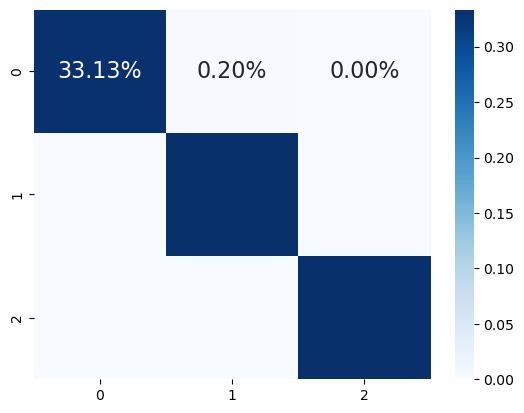

In [21]:
def plot_confusion_matrix(cm, title='THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFIER\n\n', cmap=plt.cm.Blues):
    target_names=['']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm=confusion_matrix(y_test, predicted)
print('THE CONFUSION MATRIX SCORE OF RANDOM FOREST CLASSIFIER:\n\n')
print(cm)

sns.heatmap(cm/np.sum(cm), annot=True, cmap = 'Blues', annot_kws={"size": 16},fmt='.2%')
plt.show()

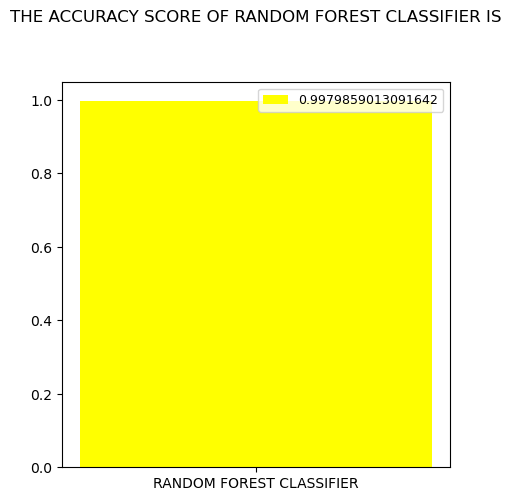

In [22]:
def graph():
    import matplotlib.pyplot as plt
    data=[a]
    alg="RANDOM FOREST CLASSIFIER"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("YELLOW"))
    plt.title("THE ACCURACY SCORE OF RANDOM FOREST CLASSIFIER IS\n\n\n")
    plt.legend(b,data,fontsize=9)
graph()

In [23]:
import joblib
joblib.dump(RFC, 'NSP1.pkl')

['NSP1.pkl']